In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn import datasets
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import re
from sklearn.model_selection import learning_curve
import time
import warnings
from sklearn.exceptions import ConvergenceWarning

In [ ]:
faces = fetch_olivetti_faces()
print(faces.DESCR)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (w

In [ ]:
faces.data.shape

(400, 4096)

In [ ]:
faces.images.shape

(400, 64, 64)

In [ ]:
np.unique(faces.target).shape

(40,)

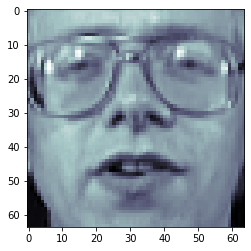

In [ ]:
plt.imshow(faces.images[10], cmap=plt.cm.bone)

In [ ]:
X, Y = faces.data, faces.target

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=True)

In [ ]:
scores = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'time'])

In [ ]:
def create_model(model, average='weighted'):
  start_time = time.time()
  model_name = re.sub(r'\([^)]*\)', '', str(model)) if str(model) != "SVC(kernel='linear')" else "SVC linear"
  
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)

  %matplotlib inline
  class_names = [0, 1]
  fig, ax = plt.subplots(figsize=(10,8))
  ax.set_title(model_name, fontsize=24)
  ticks = np.arange(len(class_names))
  plt.xticks(ticks, class_names)
  plt.yticks(ticks, class_names)
  sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)), annot=True, ax=ax)
  plt.ylabel('Действительные значения')
  plt.xlabel('Предсказанные значения')

  scores.loc[model_name] = [metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred, average='weighted', zero_division=0), 
                            metrics.recall_score(y_test, y_pred, average='weighted', zero_division=0), (time.time() - start_time)]

In [ ]:
cls = LogisticRegression(solver='lbfgs', max_iter=3000) 
svc = svm.SVC(kernel='linear')
svc_g = svm.SVC()
neigh = KNeighborsClassifier(weights='distance')
mlp = MLPClassifier(max_iter=1200)

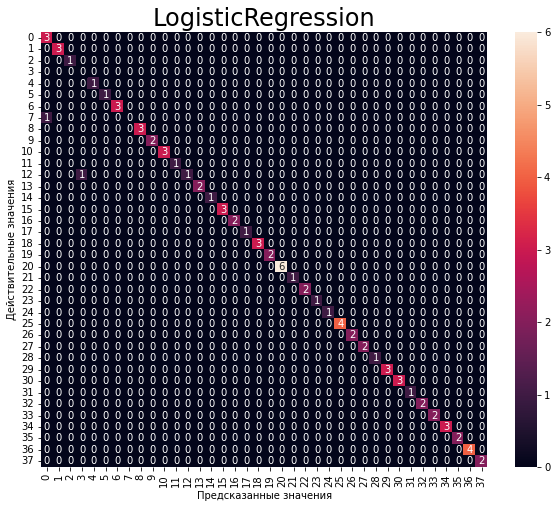

In [ ]:
create_model(cls)

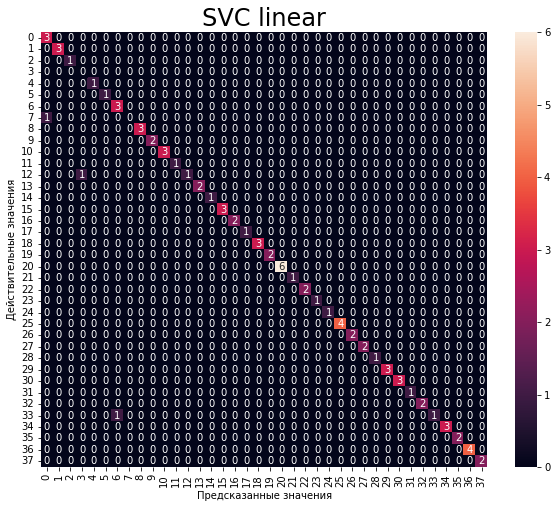

In [ ]:
create_model(svc)

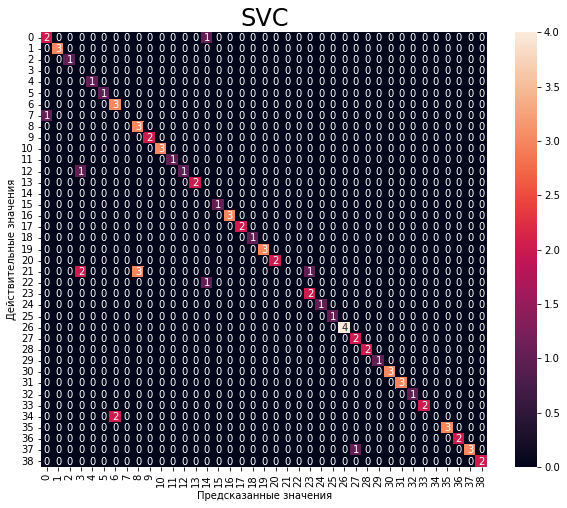

In [ ]:
create_model(svc_g)

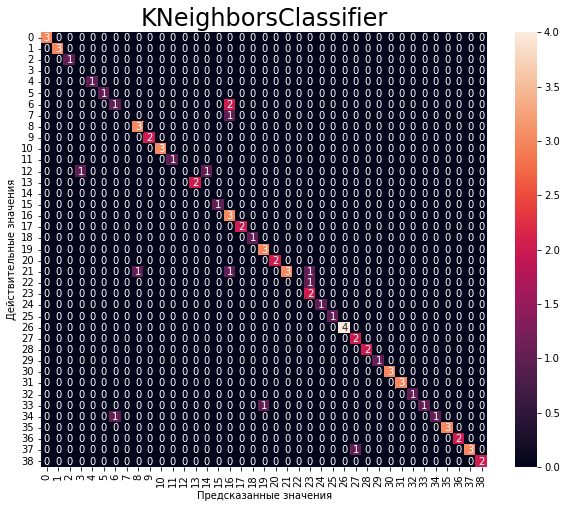

In [ ]:
create_model(neigh)

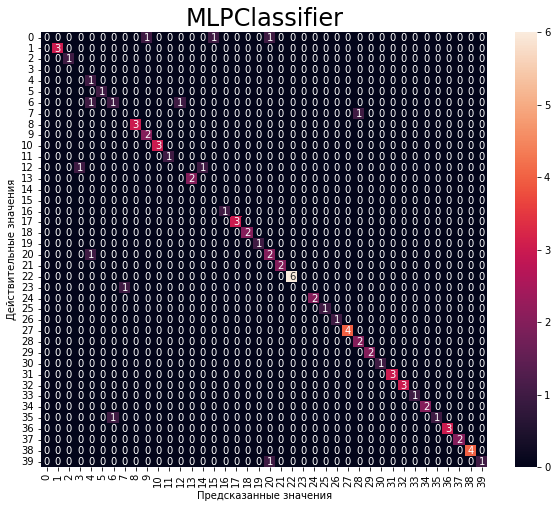

In [ ]:
create_model(mlp)

In [ ]:
scores

,accuracy,precision,recall,time
LogisticRegression,0.9750,0.978125,0.9750,47.579156
SVC linear,0.9625,0.968750,0.9625,1.081218
SVC,0.8375,0.812083,0.8375,1.166811
KNeighborsClassifier,0.8500,0.870238,0.8500,0.890004
MLPClassifier,0.8500,0.850000,0.8500,27.112692


**Как можно заметить по таблице и нарисованным матрицам, можно понять, что самая худшая модель это многослойный прецептрон, а лучше всех метод опорных векторов с гауссовым ядром и логистическая регрессия**

In [ ]:
def precision(model, x, y):
  y_pred = model.predict(x)
  return metrics.precision_score(y, y_pred, average='weighted', zero_division=0)

def recall(model, x, y):
  y_pred = model.predict(x)
  return metrics.recall_score(y, y_pred, average='weighted', zero_division=0)

def draw_learning_curve(model, x, y, size=np.linspace(0.1, 1, 10), cv=3):
  model_name = re.sub(r'\([^)]*\)', '', str(model)) if str(model) != "SVC(kernel='linear')" else "SVC linear"
  
  warnings.simplefilter("ignore", category=ConvergenceWarning)

  plt.figure(figsize=(8,5))

  for label, scoring, color in zip(['accuracy', 'precision', 'recall'], ['accuracy', precision, recall], ["r", "g", "b"]):
    sizes, training_scores, testing_scores = learning_curve(model, x, y, scoring=scoring, cv=cv, train_sizes=size)
    testing_scores[np.isnan(testing_scores)] = 0
    plt.plot(sizes, testing_scores.mean(1), '--', color=color, label=label, linewidth=3)

    
  
  plt.title(model_name, fontsize=24)
  plt.xlabel("Size"), plt.ylabel("Score"), plt.legend(loc="best")
  plt.show()

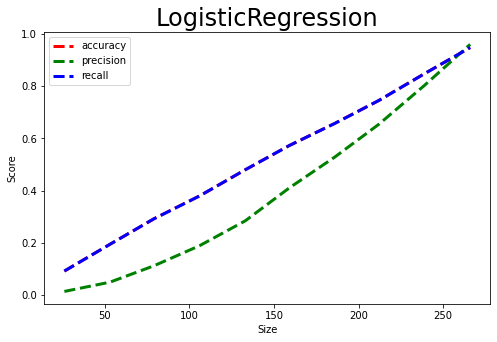

In [ ]:
draw_learning_curve(cls, faces.data, faces.target)

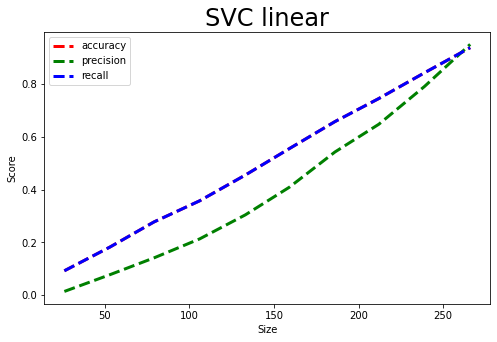

In [ ]:
draw_learning_curve(svc, X, Y)

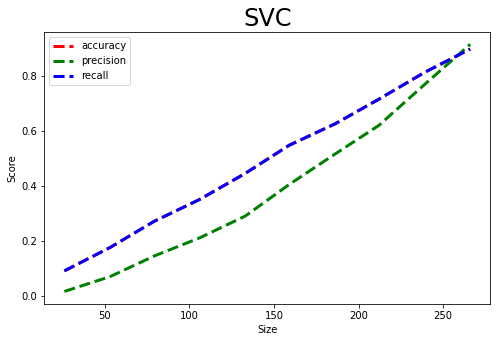

In [ ]:
draw_learning_curve(svc_g, X, Y)

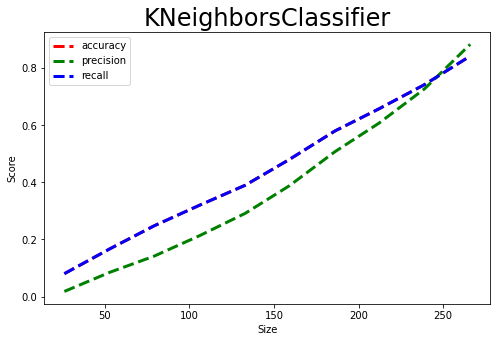

In [ ]:
draw_learning_curve(neigh, X, Y)

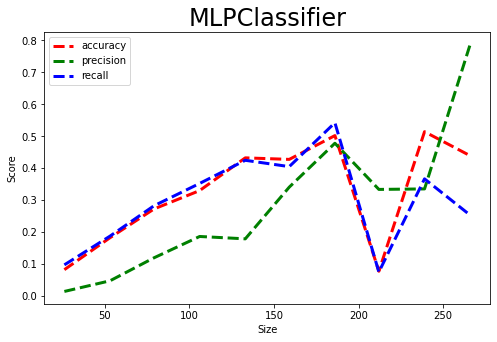

In [ ]:
draw_learning_curve(mlp, X, Y)